In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML241EN-SkillsNetwork/labs/datasets/food_items_binary.csv"
data = pd.read_csv(url)

In [3]:
print(data.head())
print(data.columns)

   Calories  Total Fat  Saturated Fat  Monounsaturated Fat  \
0     149.0          0            0.0                  0.0   
1     123.0          0            0.0                  0.0   
2     150.0          0            0.0                  0.0   
3     110.0          0            0.0                  0.0   
4     143.0          0            0.0                  0.0   

   Polyunsaturated Fat  Trans Fat  Cholesterol  Sodium  Total Carbohydrate  \
0                  0.0        0.0            0     9.0                 9.8   
1                  0.0        0.0            0     5.0                 6.6   
2                  0.0        0.0            0     4.0                11.4   
3                  0.0        0.0            0     6.0                 7.0   
4                  0.0        0.0            0     7.0                13.1   

   Dietary Fiber  Sugars  Sugar Alcohol  Protein  Vitamin A  Vitamin C  \
0            0.0     0.0              0      1.3          0          0   
1         

In [4]:
features = ['Calories', 'Total Fat', 'Saturated Fat', 'Sugars', 'Dietary Fiber', 'Protein']
target = 'class'  # Assuming 'class' is binary (suitable or not suitable for diabetic patients)

X = data[features]
y = data[target]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
svm_model = SVC(kernel='rbf', C=1, gamma='scale')
svm_model.fit(X_train, y_train)

SVC(C=1)

In [8]:
y_pred = svm_model.predict(X_test)

In [9]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9742582897033158
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      2003
           1       0.85      0.97      0.90       289

    accuracy                           0.97      2292
   macro avg       0.92      0.97      0.94      2292
weighted avg       0.98      0.97      0.97      2292



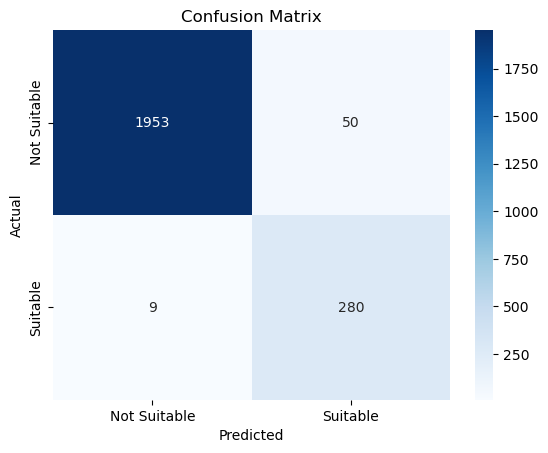

In [10]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Not Suitable', 'Suitable'], yticklabels=['Not Suitable', 'Suitable'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()